In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import time
from IPython.display import display, Image
from scipy.stats import skew
from sklearn.metrics import classification_report, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import datetime
%matplotlib inline

In [2]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [3]:
df= pd.read_csv('training.csv')
df.isna().sum().sum()

0

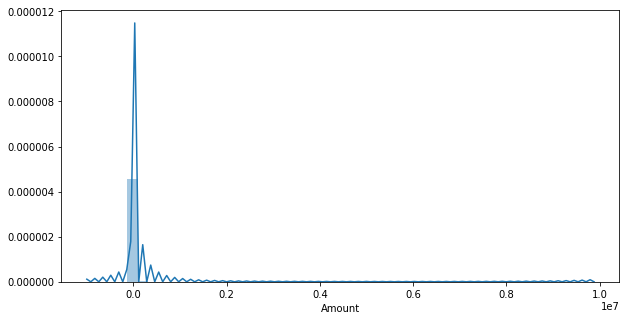

In [4]:
plt.figure(figsize=(10,5))
sns.distplot(df['Amount'])

# Shows a huge class imbalance and we have class imbalance

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

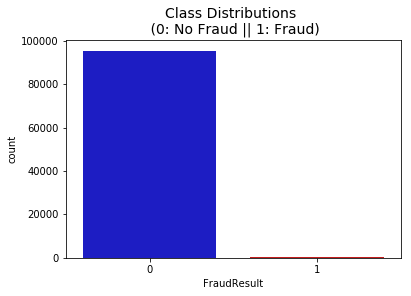

In [5]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('FraudResult', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [6]:
fraud_df=df[df['FraudResult']==1]
non_fraud_df=df[df['FraudResult']==0]
sample_size=fraud_df.shape[0] # number fraudeulent claims
sample_size
# from all non fraud cases randomly select the sample size which will help with class imbalance
non_fraud_df=non_fraud_df.sample(sample_size)
non_fraud_df.shape

(193, 16)

In [7]:
df_train = pd.concat([fraud_df, non_fraud_df])

In [8]:
df_train.shape

(386, 16)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

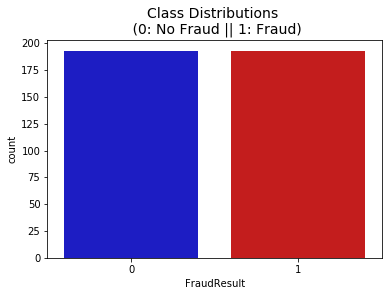

In [9]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('FraudResult', data=df_train, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Working with df_train

In [10]:
df_train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
131,TransactionId_60873,BatchId_93685,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15T08:04:51Z,0,1
146,TransactionId_28016,BatchId_125553,AccountId_2366,SubscriptionId_4834,CustomerId_7414,UGX,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,725000.0,725000,2018-11-15T08:20:09Z,2,1
155,TransactionId_1149,BatchId_10381,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15T08:31:57Z,0,1
2376,TransactionId_136904,BatchId_52644,AccountId_3692,SubscriptionId_3451,CustomerId_4134,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17T09:15:23Z,0,1
2452,TransactionId_88818,BatchId_54481,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17T11:49:46Z,0,1


In [11]:
y=df_train['FraudResult']
X=df_train.drop('FraudResult',axis=1)

In [12]:
X.drop(['TransactionId','BatchId','SubscriptionId','Value','CurrencyCode'],axis=1)

,AccountId,CustomerId,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy
131,AccountId_3832,CustomerId_4275,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,2018-11-15T08:04:51Z,0
146,AccountId_2366,CustomerId_7414,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,725000.0,2018-11-15T08:20:09Z,2
155,AccountId_3832,CustomerId_4275,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,2018-11-15T08:31:57Z,0
2376,AccountId_3692,CustomerId_4134,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,700000.0,2018-11-17T09:15:23Z,0
2452,AccountId_3832,CustomerId_4275,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,2018-11-17T11:49:46Z,0
3778,AccountId_2366,CustomerId_7414,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,905000.0,2018-11-19T12:10:31Z,2
4500,AccountId_1959,CustomerId_2353,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,800000.0,2018-11-20T12:00:29Z,0
4508,AccountId_4003,CustomerId_4453,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,770000.0,2018-11-20T12:27:15Z,0
4755,AccountId_3943,CustomerId_4391,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,500000.0,2018-11-20T22:11:53Z,0
4911,AccountId_4590,CustomerId_5054,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,500000.0,2018-11-21T08:26:49Z,4


# Dealing with time variable

In [15]:
X['TransactionStartTime']=X['TransactionStartTime'].map(lambda x:x[0:10])    
X['TransactionStartTime']=X['TransactionStartTime'].map(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))  
X['TransactionStartTime']=X['TransactionStartTime'].map(lambda x:to_integer(x))

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
131,TransactionId_60873,BatchId_93685,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,20181115,0
146,TransactionId_28016,BatchId_125553,AccountId_2366,SubscriptionId_4834,CustomerId_7414,UGX,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,725000.0,725000,20181115,2
155,TransactionId_1149,BatchId_10381,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,20181115,0
2376,TransactionId_136904,BatchId_52644,AccountId_3692,SubscriptionId_3451,CustomerId_4134,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,700000.0,700000,20181117,0
2452,TransactionId_88818,BatchId_54481,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,20181117,0


In [16]:
X.shape

(386, 15)

# Train tests splits

In [17]:
X=pd.get_dummies(X)
X.head()

,CountryCode,Amount,Value,TransactionStartTime,PricingStrategy,TransactionId_TransactionId_100029,TransactionId_TransactionId_100034,TransactionId_TransactionId_10029,TransactionId_TransactionId_100613,TransactionId_TransactionId_100694,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
131,256,700000.0,700000,20181115,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
146,256,725000.0,725000,20181115,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
155,256,700000.0,700000,20181115,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2376,256,700000.0,700000,20181117,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2452,256,700000.0,700000,20181117,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [18]:
X.shape

(386, 1296)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Machine Learning Test with f1 score

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [21]:
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    return f1_score(y_test, y_pred)  

# Logistic Regression

In [22]:
run_model(LogisticRegression(),X_train,y_train,X_test,y_test)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9876543209876543

# Linear Discriminant Analysis

In [23]:
run_model(svm.SVC(),X_train,y_train,X_test,y_test)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8115942028985507

# Support Vector Machine

In [24]:
run_model(svm.SVC(),X_train,y_train,X_test,y_test)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8115942028985507

# Quadratic  Discriminant Analysis

In [25]:
run_model(QuadraticDiscriminantAnalysis(),X_train,y_train,X_test,y_test)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.689075630252101

# Naive Bayes

In [26]:
run_model(GaussianNB(),X_train,y_train,X_test,y_test)

0.9876543209876543

# Test data

In [27]:
test=pd.read_csv('test.csv')

In [28]:
test.isna().sum().sum()

0

In [29]:
test.drop('CurrencyCode',axis=1)
test.drop('Value',axis=1)
test.drop(['TransactionId','BatchId','SubscriptionId'],axis=1)
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [30]:
test['TransactionStartTime']=test['TransactionStartTime'].map(lambda x:x[0:10])    
test['TransactionStartTime']=test['TransactionStartTime'].map(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))  
test['TransactionStartTime']=test['TransactionStartTime'].map(lambda x:to_integer(x))

In [34]:
X_test=test.iloc[:15000]
X_test=pd.get_dummies(X_test)
X_test.head()

,CountryCode,Amount,Value,TransactionStartTime,PricingStrategy,TransactionId_TransactionId_100003,TransactionId_TransactionId_100004,TransactionId_TransactionId_100012,TransactionId_TransactionId_100035,TransactionId_TransactionId_100038,...,ProductCategory_movies,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,256,1000.0,1000,20190213,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,256,2000.0,2000,20190213,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,256,-50.0,50,20190213,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,256,3000.0,3000,20190213,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,256,-60.0,60,20190213,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
def tests_model(model):
    y_pred=model.predict(X_test)
    return y_pred

In [33]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(test)    

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'TransactionId_50600'